# 1. Decision Tree

## 1.1. Thuật toán
[Decision Tree](https://scikit-learn.org/stable/modules/tree.html#tree) là một thuật toán tìm ra tập hợp các câu điều kiện if-else để phân chia tập dữ liệu vào các lớp, và có thể trực quan hóa dạng sơ đồ cây (hierarchy diagram).

### Thành phần của 1 cây 

Trong một cây, mỗi node đại diện cho dữ liệu, dữ liệu được phân tách bằng các feature. Một node được gọi là node cha nếu nó tiếp tục được chia nhỏ, node nhỏ hơn sau khi chia được gọi là node con. Sau đây là các thành phần trong 1 cây:
- Node gốc (root node): node cao nhất, đại diện cho toàn bộ dữ liệu
- Node lá (leaf node): Node không thể chia được nữa, dữ liệu trong cùng node lá sẽ thuộc cùng class và được sử dụng để dự đoán nhãn
- Không phải node lá (non-leaf node): Các node không phải node lá, thường thể hiện câu hỏi phân tách.
- Nhánh (branch): một mốc cụ thể dùng để chia dữ liệu thành các node

<img src='image/decision_tree_iris.png' style='height:400px; margin: 0 auto 20px;'>

### Quá trình phân tách

Ý tưởng chính của cây quyết định là chọn ra biến được sử dụng để chia dữ liệu tại mỗi node sao cho dữ liệu tại mỗi nhánh đồng nhất/giống nhau nhất có thể, việc này sẽ giúp chúng ta dễ dàng hơn trong việc tiếp tục chia nhỏ dữ liệu tại mỗi nhánh.

- Bắt đầu tại root node $\mathbf{D}$, chúng ta tìm biến phù hợp nhất để chia dữ liệu. Giả sử biến $\mathbf{x}$ được sử dụng, các giá trị của biến $\mathbf{x}$ là  $x_1,x_2,\dots$. Kết quả của việc sử dụng $\mathbf{x}$ để chia node $\mathbf{D}$ cho ta các node con $\mathbf{D}|x_1,\mathbf{D}|x_2,\dots$.

- Tính độ vẩn đục (impurity) của mỗi biến sử dụng, bằng hệ số entropy hoặc gini. Biến nào cho kết quả impurity thấp nhất sẽ được sử dụng để chia cây.

- Quá trình này sẽ được lặp lại liên tục đến khi mọi node lá đủ tinh khiết để có thể phân lớp. Có thể set điều kiện dừng cho quá trình này để tránh việc cây quá phức tạp và gây ra overfitting.

### Đại lượng đo độ vẩn đục

Giả sử tại mỗi node, dữ liệu có các nhãn $y_1,y_2,\dots$. Xác suất 1 quan sát rơi vào nhãn $y_i$ là $p_i$. Dưới đây là 2 công thức tính độ vẩn đục:

- $\displaystyle{\mbox{Entropy} = -\sum{p_i\ln{p_i}}}$

- $\displaystyle{\mbox{Gini} = 1-\sum{p_i^2}}$

Tại mỗi node cha $\mathbf{D}|\mathbf{x}$, entropy hoặc gini được tính bằng tổng có trọng số của các entropy/gini tại các node con. Trọng số sẽ tỷ lệ với số điểm dữ liệu trong node đó. Entropy/gini càng thấp thì dữ liệu càng thuần khiết. Nếu mọi điểm dữ liệu đều rơi vào cùng 1 lớp thì enropy và gini đều bằng 0.

**Ví dụ:** Xây dựng cây quyết định từ dữ liệu đột quỵ, sử dụng gini index

In [1]:
import numpy as np
import pandas as pd

In [38]:
df = pd.DataFrame({'chest_pain':           [1,1,0,1,0,0,1,0,1,1,0,1,0],
                  'good_blood_circulation':[1,0,1,0,0,1,0,0,1,0,0,1,1],
                  'blocked_ateries':       [0,1,0,1,0,1,1,1,1,0,1,1,1],
                  'heart_disease':         [0,1,0,1,0,1,1,1,0,1,1,1,0]})
df.head()

,chest_pain,good_blood_circulation,blocked_ateries,heart_disease
0,1,1,0,0
1,1,0,1,1
2,0,1,0,0
3,1,0,1,1
4,0,0,0,0


Để chọn ra biến đầu tiên tại root node, ta sẽ tính gini index cho từng biến.

<img src='image/build_tree_1.png' style='height:200px; margin: 0 auto 20px;'>

In [32]:
# chest pain
g1_left = 1 - (3/6)**2 - (3/6)**2
g1_right = 1 - (5/7)**2 - (2/7)**2

gini_chest_pain = (6/13)*g1_left + (7/13)*g1_right
gini_chest_pain

0.45054945054945056

In [11]:
# good blood circulation
g1_left = 1 - (6/7)**2 - (1/7)**2
g1_right = 1 - (2/6)**2 - (4/6)**2

gini_good_blood = (7/13)*g1_left + (6/13)*g1_right
gini_good_blood

0.336996336996337

In [16]:
# blocked ateries
g1_left = 1 - (3/4)**2 - (1/4)**2
g1_right = 1 - (7/9)**2 - (2/9)**2

gini_block_ateries = (7/13)*g1_left + (6/13)*g1_right
gini_block_ateries

0.36146723646723644

Gini của biến `good_blood_circulation` là nhỏ nhất. Vậy ta chọn biến `good_blood_circulation` cho root node và tiếp tục chia cây, đầu tiên với nhánh bên trái của cây ta tính gini index cho 2 biến còn lại.

<img src='image/build_tree_2.png' style='height:300px; margin: 0 auto 20px;'>

In [48]:
# chest pain
g2_left = 1 - (1/3)**2 - (2/3)**2 
g2_right = 1 - (4/4)**2

gini_2_chest_pain = 3/7 *g2_left + 4/7*g2_right
gini_2_chest_pain

0.19047619047619047

In [27]:
# blocked ateries
g2_left = 1 - (1/2)**2 - (1/2)**2 
g2_right = 1 - (5/5)**2

gini_2_blocked_ateries = 2/7 *g2_left + 5/7*g2_right
gini_2_blocked_ateries

0.14285714285714285

Ở node thứ 2 bên trái, biến `blocked_ateries` cho kết quả gini thấp hơn, ta chọn `blocked_ateries`. Tiếp tục tương tự với nhánh bên phải của cây ta có:

In [52]:
g2_cp_left = 1 - (1/3)**2 - (2/3)**2 
g2_cp_right = 1 - (2/3)**2 - (1/3)**2

gini_2_chest_pain = 3/6 *g2_cp_left + 3/6*g2_cp_right
gini_2_chest_pain

0.4444444444444444

In [56]:
g2_gb_left = 1 - (2/2)**2  
g2_gb_right = 1 - (2/4)**2 - (2/4)**2

gini_2_gb = 2/6 *g2_gb_left + 4/9*g2_gb_right
gini_2_gb

0.2222222222222222

Ở node thứ 2 bên phải ta chọn biến `blocked_ateries`. Với những leaf node chưa thuần khiết hoàn toàn có thể tiếp tục xây cây tuy nhiên có thể dẫn đến overfit vậy nên ta kết thúc xây cây tại đây. Kết quả cho thấy những người có tuần hoàn máu không tốt đồng thời có cục máu đông sẽ có khả năng bị đột quỵ cao hơn và ngược lại.

<img src='image/build_tree_3.png' style='height:300px; margin: 0 auto 20px;'>

## 1.2. Một số cách tránh overfitting

Trong decision tree, nếu ta tiếp tục chia đến khi tất cả các điểm dữ liệu đều thuộc cùng 1 lớp thì cây sẽ rất phức tạp và có thể dẫn đến overfit. Một số cách để tránh overfit khi sử dụng decision tree:

- Sử dụng điều kiện dừng: Sử dụng 1 trong số các điều kiện sau đây để dừng quá trình xây dựng cây quyết định
    + Khi số điểm dữ liệu đến một ngưỡng nào đó ta có thể dừng xây để tránh việc 1 node chỉ chứa 1 điểm dữ liệu. 
    + Giới hạn chiều sâu của cây so với root node để tránh việc cây quá phức tạp
    + Set ngưỡng cho tổng số leaf node của cây
- Pruning tree: Pruning là một kĩ thuật regularization để tránh overfit cho cây, cách làm sẽ là xây dựng cây đến khi tất cả các điểm dữ liệu trong 1 node thuộc cùng 1 lớp, sau đó cắt tỉa các leaf-node có chung non-leaf node và non-leaf node đó trở thành leaf-node. Cách xác định node cần pruning là sử dụng 1 tập validation, sau khi xây cây xong ta sẽ sử dụng tập validation đi ngược từ các leaf-node, cắt tỉa các leaf-node và giữ lại node bố mẹ nếu độ chính xác có được cải thiện, nếu không thì dừng quá trình pruning.

## 1.3. Implementation
Một số hyperparameters cần chú ý trong [Decision Tree implementation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

Hyperparameter|Meaning|Default value|Common values|
:---|:---|:---|:---|
`criterion='gini'`|Measure of impurity|`gini`|`entropy` `gini`|
`max_depth`|Max depth of the tree|`None`||
`max_leaf_nodes`||||
`min_impurity_split`|The threshold that nodes no longer split|`0`|`0.1` `0.2`|
`min_impurity_decrease`||||
`min_samples_split`|The min number of instances in a node to split|`2`||
`min_samples_leaf`|The min number of instances of a node to be a leaf|||
`min_weight_fraction_leaf`||||

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
credit = pd.read_csv('data/credit_scoring.csv')
credit = credit.dropna().reset_index()
credit.head()

,index,bad_customer,credit_balance_percent,age,num_of_group1_pastdue,debt_ratio,income,num_of_loans,num_of_times_late_90days,num_of_estate_loans,num_of_group2_pastdue,num_of_dependents
0,0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [16]:
y = credit.bad_customer.values
X = credit.drop(columns='bad_customer')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,10),
}

tree = DecisionTreeClassifier()
tree = GridSearchCV(tree, params, cv=5)
tree = tree.fit(X_train, y_train)

tree.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [19]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [20]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     89538
           1       0.58      0.20      0.29      6677

    accuracy                           0.93     96215
   macro avg       0.76      0.59      0.63     96215
weighted avg       0.92      0.93      0.92     96215



In [18]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22387
           1       0.54      0.17      0.26      1667

    accuracy                           0.93     24054
   macro avg       0.74      0.58      0.61     24054
weighted avg       0.91      0.93      0.92     24054



### Interpreting

Độ sâu của cây bằng 3 sẽ phù hợp nhất để visualization. Mỗi màu sẽ đại diện cho 1 lớp, node màu đậm là node thuần khiết nhất, vì vậy khá khó để phân lớp dựa trên node màu sáng.

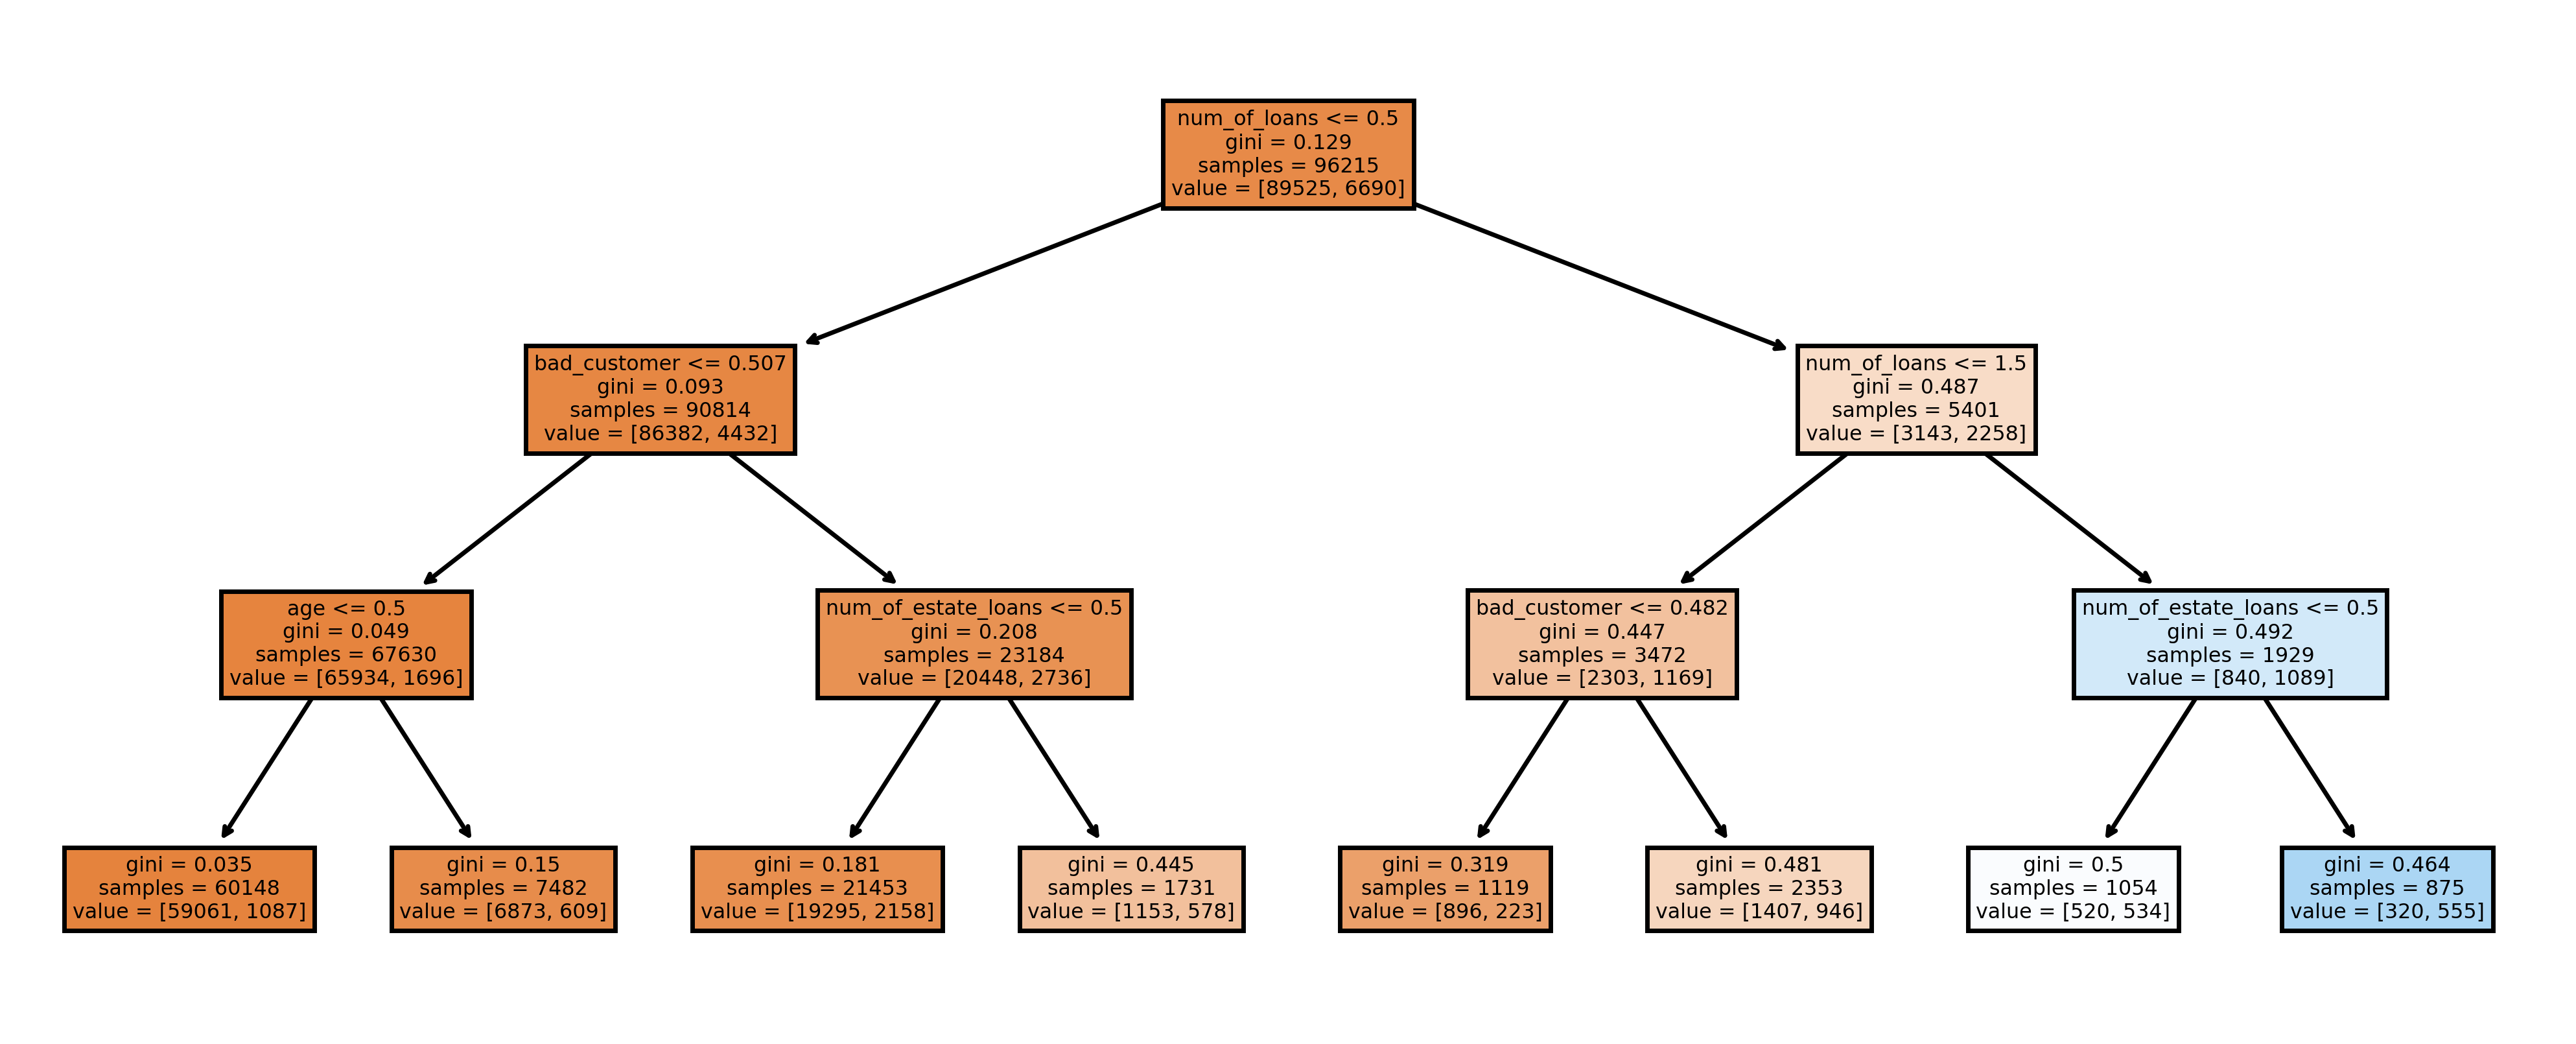

In [19]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
tree = tree.fit(X_train, y_train)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4), dpi=500)
plot_tree(tree, feature_names=credit.columns.values, filled=True)
plt.show()

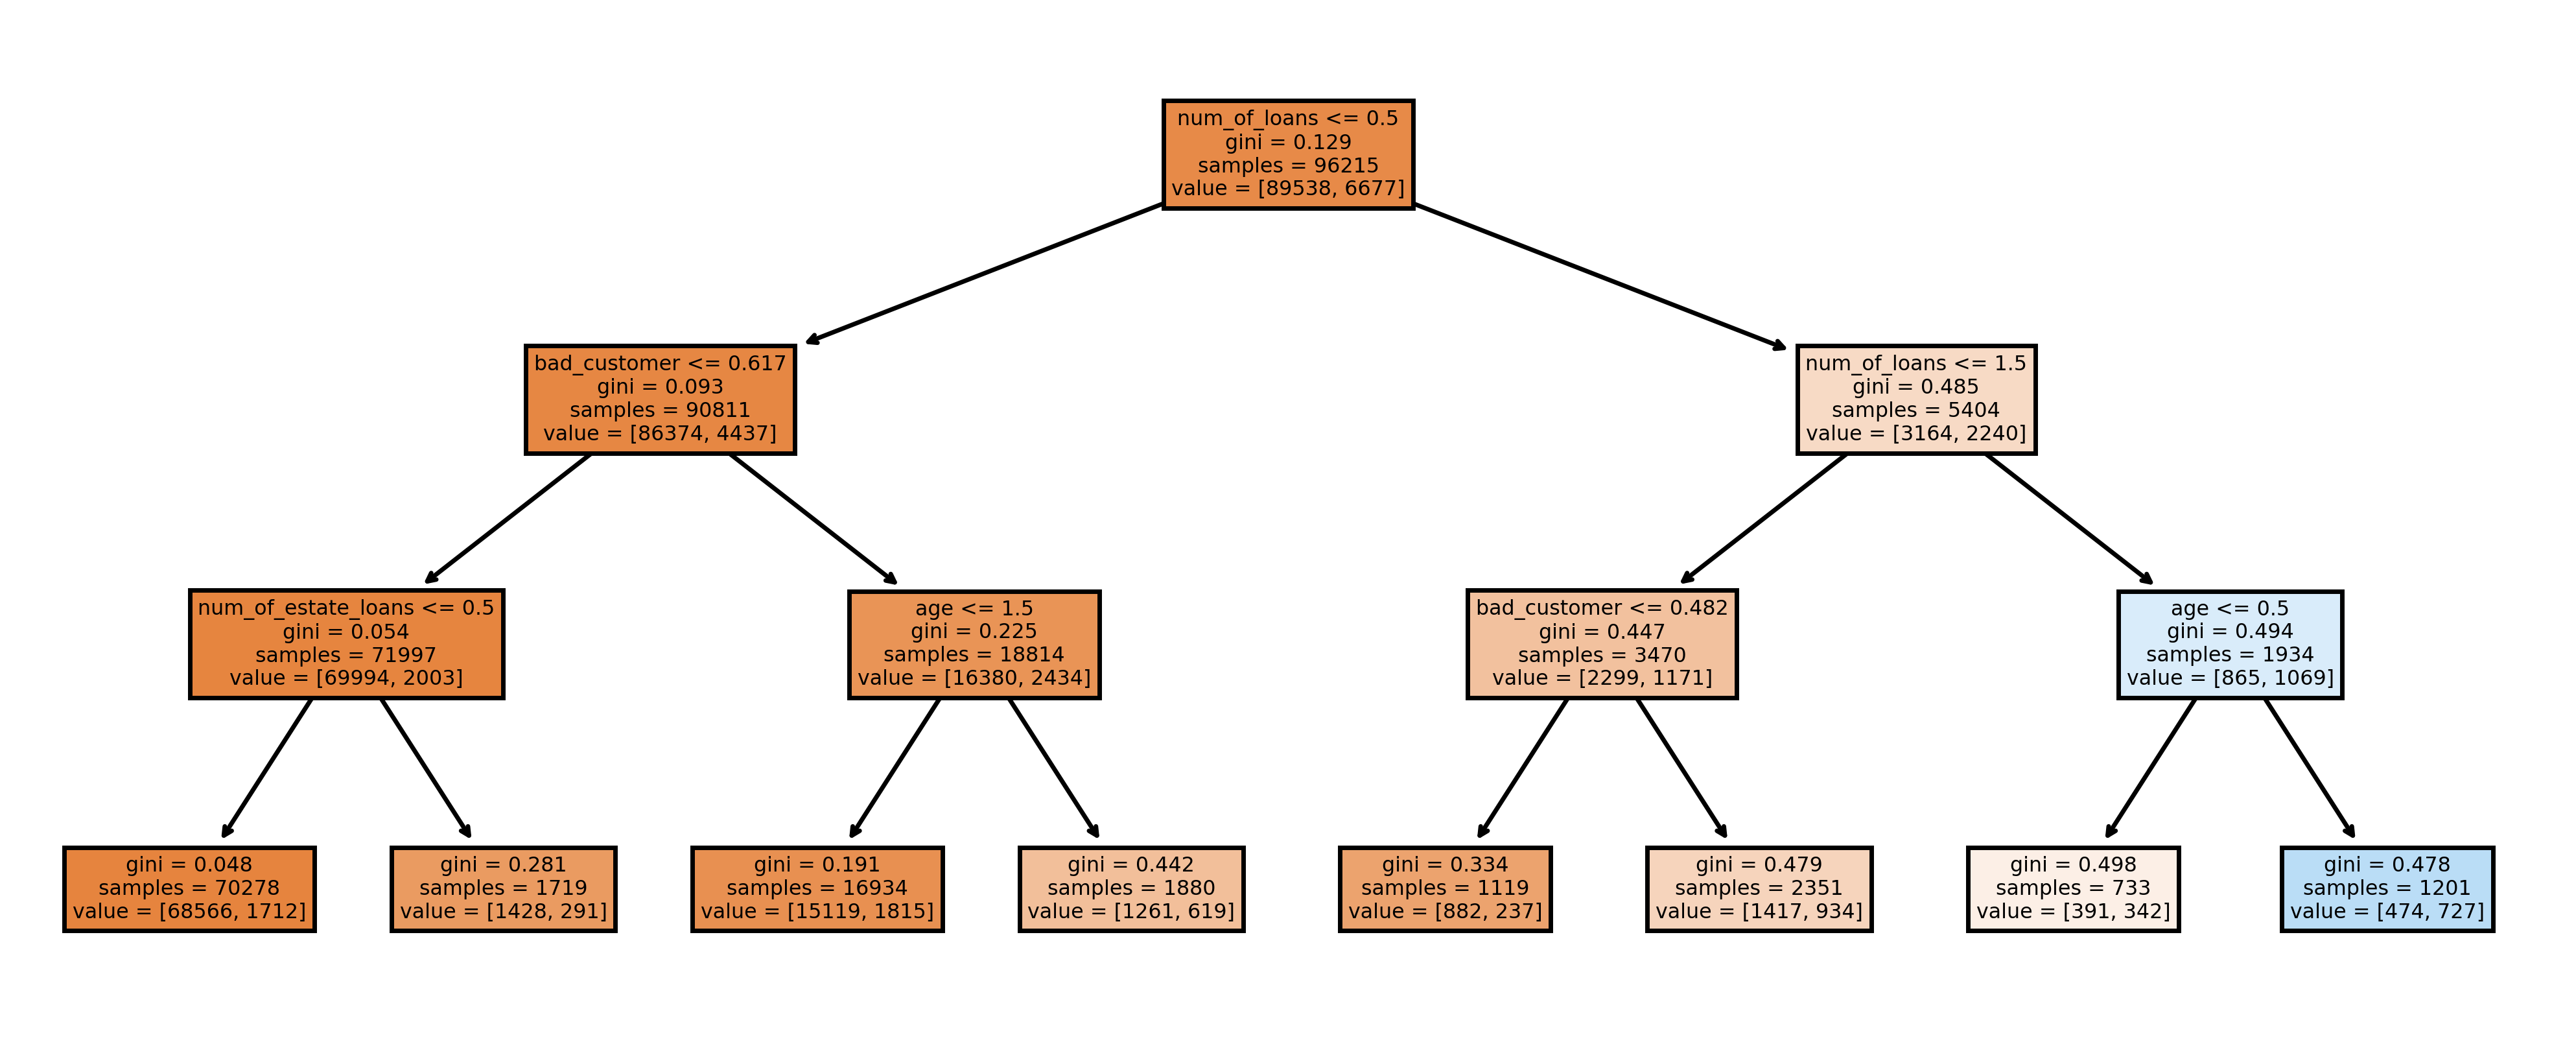

In [21]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
tree = tree.fit(X_train, y_train)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4), dpi=500)
plot_tree(tree, feature_names=credit.columns.values, filled=True)
plt.show()

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris

In [35]:
df = pd.read_csv('data/iris.csv')

X = df.drop(columns='species').values
y = df.species.values

In [10]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

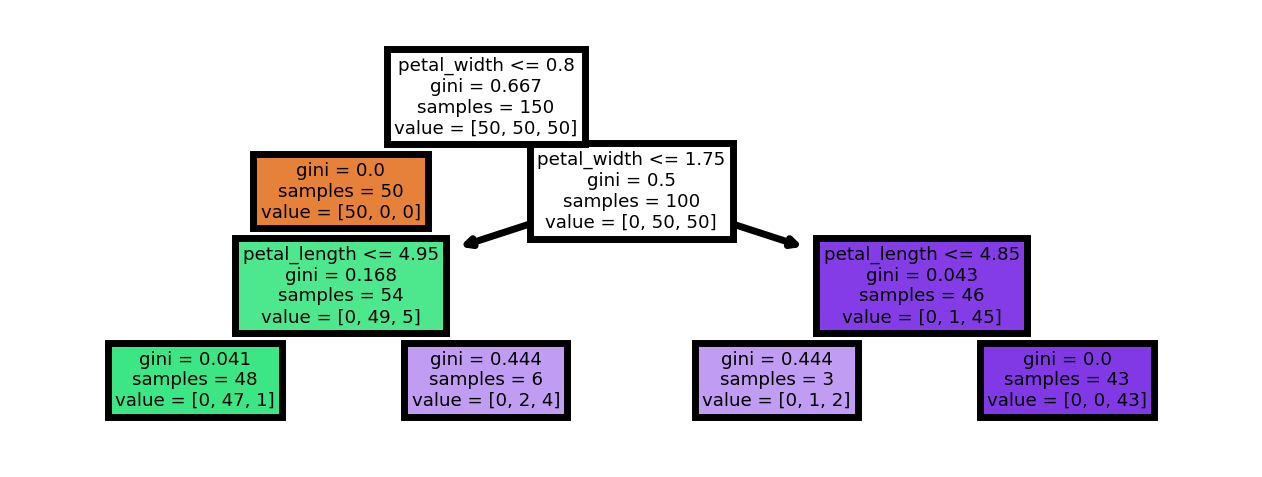

In [36]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
tree = tree.fit(X, y)

import matplotlib.pyplot as plt

plt.figure(dpi=500, figsize=(3, 1))
plot_tree(tree, feature_names=df.columns, filled=True)
plt.show()

In [41]:
tree.tree_.children_left

array([ 1, -1,  3,  4, -1, -1,  7, -1, -1], dtype=int64)

In [47]:
tree.tree_.children_right

array([ 2, -1,  6,  5, -1, -1,  8, -1, -1], dtype=int64)

In [46]:
tree.decision_path(XTrain).toarray().shape

(120, 9)